# XML gaze data to pandas data and figures

In [1]:
#additional helpful source:
#http://docs.python-guide.org/en/latest/scenarios/xml/

import xmltodict
import pandas as pd
import time
import glob

In [2]:
pid = 6

In [3]:
# get filenames
filelist = [fil for fil in glob.glob('../../ETRAdata/FixedETRAdata/*.xml')]
filepairs = [(i, k) for i,k in zip(filelist[0::2], filelist[1::2])]

In [4]:
filepairs[pid-1]

('../../ETRAdata/FixedETRAdata\\data_1_24_2018_11_17_50_AM.xml',
 '../../ETRAdata/FixedETRAdata\\data_1_24_2018_11_25_05_AM.xml')

In [5]:
filepairs[pid-1][0]

'../../ETRAdata/FixedETRAdata\\data_1_24_2018_11_17_50_AM.xml'

## Functions

### Import XML to dict

In [6]:
def xml_to_dict(filepath):
    with open(filepath) as fd:
        myxml = xmltodict.parse(fd.read())
    
    return myxml

### Dict to pandas

In [7]:
'''Read attributes to pandas format'''
def read_to_pandas(myxml, session):
   

    hx = [i['@GazePointUnity'][1:-2].split(",")[0] for i in myxml['Data']['GazePointCombined']]
    hy = [i['@GazePointUnity'][1:-2].split(",")[1] for i in myxml['Data']['GazePointCombined']]
    hz = [i['@GazePointUnity'][1:-2].split(",")[2] for i in myxml['Data']['GazePointCombined']]
    hs = [i['@stage'] for i in myxml['Data']['StageType']] 
    ht = [i['@type'] for i in myxml['Data']['StageType']] 
    hse = [session for i in myxml['Data']['StageType']]

    mylist = zip (hx, hy, hz, hs, ht, hse)
    
    return pd.DataFrame(mylist, columns=['gpu_x','gpu_y','gpu_z','stage','type', 'session'])
    

## Define and read two XML files to one pandas dataframe

In [8]:
# Define paths
filea = filepairs[pid-1][0]
fileb = filepairs[pid-1][1]

start = time.time() # start timer

dfa = read_to_pandas(xml_to_dict(filea), 1) #read file a
dfb = read_to_pandas(xml_to_dict(fileb), 2) #read file a
df = pd.concat([dfa, dfb]).reset_index(drop=True) #combine dataframes

end = time.time()
print(end - start), ' seconds'

22.9900000095  seconds


#### Checks

In [9]:
df.head(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
0,0000.00000000,0000.00000000,-0000.7800000,0,2,1
1,0000.00000000,0000.00000000,-0000.7800000,0,2,1


In [10]:
df.tail(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
59808,-0006.82489000,-0033.89632000,-0200.6799000,4,2,2
59809,-0064.43005000,-0037.94939000,-0262.7061000,4,2,2


In [11]:
dfa.head(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
0,0000.00000000,0000.00000000,-0000.7800000,0,2,1
1,0000.00000000,0000.00000000,-0000.7800000,0,2,1


In [12]:
dfb.head(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
0,0000.00000000,0000.00000000,-0000.7800000,0,2,2
1,0000.00000000,0000.00000000,-0000.7800000,0,2,2


In [13]:
dfa.tail(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
29824,-0026.76501000,-0002.71240200,-0362.7341000,4,2,1
29825,-0001.26562500,0000.92776760,-0022.5435900,4,2,1


In [14]:
dfb.tail(2)

,gpu_x,gpu_y,gpu_z,stage,type,session
29982,-0006.82489000,-0033.89632000,-0200.6799000,4,2,2
29983,-0064.43005000,-0037.94939000,-0262.7061000,4,2,2


In [15]:
'''Check the length and data format'''
len(dfa), len(dfb), len(df), type(df.gpu_x[0])

(29826, 29984, 59810, unicode)

## Data massage

In [16]:
'''Remove extra white space and cpnvert to float format'''
cols = ['gpu_x', 'gpu_y', 'gpu_z', 'stage', 'type', 'session']
df[cols] = df[cols].replace(' ','').astype(float)

In [17]:
'''Normed z value: inverse of (min-max scaling + .1)
.1 added to avoid 0'''
norm = lambda x: 1/(((x - x.min()) / (x.max()-x.min()))+.1)
df['gpu_nz'] = df['gpu_z'].transform(norm)

In [18]:
# Check
df['gpu_nz'].min(), df['gpu_nz'].max()

(0.90909090909090906, 10.0)

## Figures

In [19]:
import seaborn as sns
sns.set(style="white", color_codes=True)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

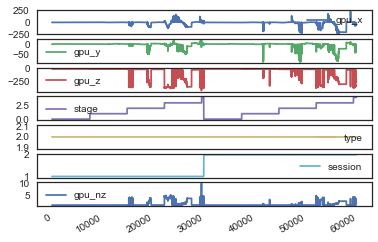

In [20]:
'''Just out of curiosity'''
df.plot(subplots=True);

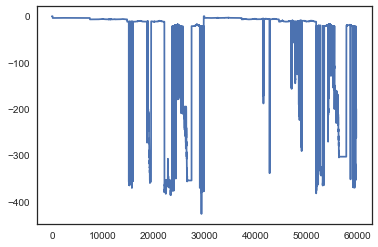

In [21]:
%matplotlib inline
df.gpu_z.plot();

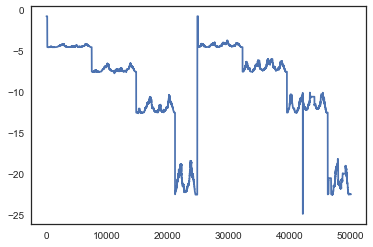

In [22]:
%matplotlib inline
df[df.gpu_z>-25].gpu_z.reset_index(drop=True).plot();

In [23]:
len(df[df.gpu_z<-25])/float(len(df)), len(df[df.gpu_z<-25]), len(df)

(0.1622136766427019, 9702, 59810)

In [24]:
print pid

6
